## Importing Libraries ##

In [1]:
# pip install import-ipynb

In [2]:
# pip install pyyaml

In [63]:
import import_ipynb
from Data_Generation import csvBuilder
import numpy as np
import yaml
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as Sklp
import joblib
import os

## Data initialization ##

In [4]:
n = 15000

industries = ['FinTech', 'HealthTech', 'E-Commerce', 'AI', 'EdTech', 'SaaS', 'Gaming', 'Biotech']
industry_probs = [0.15, 0.12, 0.2, 0.18, 0.1, 0.1, 0.08, 0.07]

countries = ['US', 'India', 'UK', 'Germany', 'Canada', 'Israel', 'Singapore']
country_probs = [0.4, 0.2, 0.1, 0.08, 0.08, 0.07, 0.07]

funding_means = {
    'FinTech': 18_000_000,
    'HealthTech': 15_000_000,
    'E-Commerce': 12_000_000,
    'AI': 22_000_000,
    'EdTech': 8_000_000,
    'SaaS': 14_000_000,
    'Gaming': 10_000_000,
    'Biotech': 25_000_000
}

In [5]:
data = csvBuilder(n,industries,industry_probs,countries,country_probs,funding_means)

In [6]:
df = data.generate()

## Data Exploration begins !!! EDA ##

In [7]:
df.head(3)

,company_name,founded_on,industry,headquarters,founder_experience,total_funding_usd,num_funding_rounds,investors_count,last_funding_date,status
0,Higgins Ltd,2012-05-10,AI,Germany,1.0,23084966,2,5,2018-04-06,fail
1,Vang-Lambert,2020-04-30,HealthTech,US,6.0,17165649,2,2,2021-10-23,fail
2,Castro-Chavez,2018-06-20,Gaming,India,1.0,4997894,3,7,2020-08-04,fail


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_name        15000 non-null  object        
 1   founded_on          15000 non-null  datetime64[ns]
 2   industry            14250 non-null  object        
 3   headquarters        15000 non-null  object        
 4   founder_experience  14250 non-null  float64       
 5   total_funding_usd   15000 non-null  int64         
 6   num_funding_rounds  15000 non-null  int64         
 7   investors_count     15000 non-null  int64         
 8   last_funding_date   14250 non-null  datetime64[ns]
 9   status              15000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 1.1+ MB


In [9]:
df.describe()

,founded_on,founder_experience,total_funding_usd,num_funding_rounds,investors_count,last_funding_date
count,15000,14250.000000,1.500000e+04,15000.000000,15000.000000,14250
mean,2016-06-26 15:58:04.800000,4.500772,1.900127e+07,2.756733,4.401400,2021-04-20 23:52:01.010526464
min,2010-01-01 00:00:00,0.000000,1.000000e+06,1.000000,1.000000,2011-01-26 00:00:00
25%,2013-03-27 18:00:00,1.000000,1.254070e+07,1.000000,3.000000,2018-08-01 00:00:00
50%,2016-07-04 00:00:00,3.000000,1.744742e+07,2.000000,4.000000,2021-12-21 00:00:00
75%,2019-09-17 06:00:00,6.000000,2.404204e+07,4.000000,6.000000,2025-03-31 00:00:00
max,2022-12-31 00:00:00,52.000000,5.836008e+07,8.000000,14.000000,2025-03-31 00:00:00
std,NaN,4.962874,8.660813e+06,1.836349,1.941613,NaN


In [10]:
df.isnull().sum()

company_name            0
founded_on              0
industry              750
headquarters            0
founder_experience    750
total_funding_usd       0
num_funding_rounds      0
investors_count         0
last_funding_date     750
status                  0
dtype: int64

<Axes: xlabel='num_funding_rounds', ylabel='total_funding_usd'>

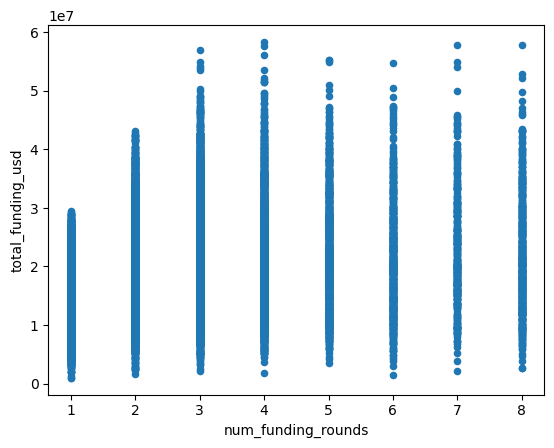

In [11]:
df.plot(x='num_funding_rounds',y='total_funding_usd', kind='scatter')

In [12]:
df['founder_experience'].median()

3.0

In [13]:
df['founder_experience'].fillna(df['founder_experience'].median(), inplace=True)

/var/folders/0m/4hw6y0_118q535jgs9dp4h440000gn/T/ipykernel_51246/1299175883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['founder_experience'].fillna(df['founder_experience'].median(), inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_name        15000 non-null  object        
 1   founded_on          15000 non-null  datetime64[ns]
 2   industry            14250 non-null  object        
 3   headquarters        15000 non-null  object        
 4   founder_experience  15000 non-null  float64       
 5   total_funding_usd   15000 non-null  int64         
 6   num_funding_rounds  15000 non-null  int64         
 7   investors_count     15000 non-null  int64         
 8   last_funding_date   14250 non-null  datetime64[ns]
 9   status              15000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 1.1+ MB


<Axes: >

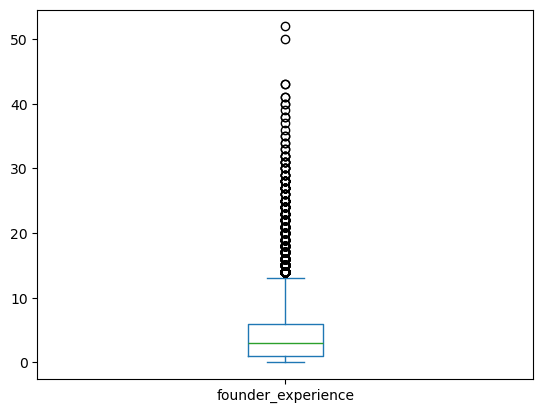

In [15]:
df['founder_experience'].plot(kind='box')

<Axes: >

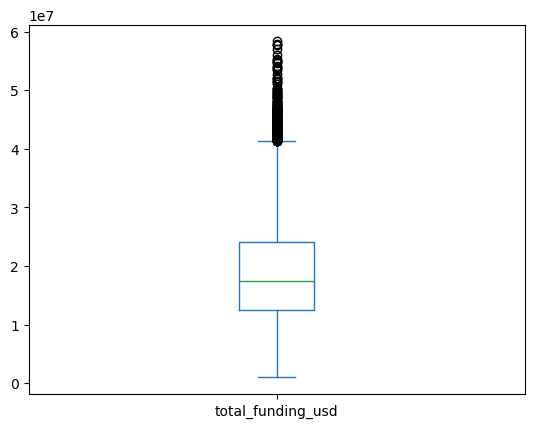

In [16]:
df['total_funding_usd'].plot(kind='box')

In [17]:
df.dropna(subset=['last_funding_date'], inplace=True)

In [18]:
df['last_funding_date']

0       2018-04-06
1       2021-10-23
2       2020-08-04
3       2012-11-24
4       2025-03-31
           ...    
14994   2017-03-06
14996   2021-01-16
14997   2017-03-05
14998   2022-03-06
14999   2012-11-22
Name: last_funding_date, Length: 14250, dtype: datetime64[ns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14250 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_name        14250 non-null  object        
 1   founded_on          14250 non-null  datetime64[ns]
 2   industry            13534 non-null  object        
 3   headquarters        14250 non-null  object        
 4   founder_experience  14250 non-null  float64       
 5   total_funding_usd   14250 non-null  int64         
 6   num_funding_rounds  14250 non-null  int64         
 7   investors_count     14250 non-null  int64         
 8   last_funding_date   14250 non-null  datetime64[ns]
 9   status              14250 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 1.2+ MB


In [20]:
df['industry'] = df['industry'].fillna(df['industry'].mode()[0])

<Axes: xlabel='industry', ylabel='total_funding_usd'>

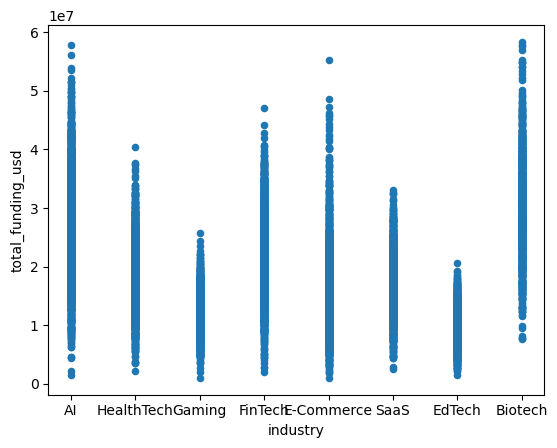

In [21]:
df.plot(x='industry',y='total_funding_usd', kind='scatter')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14250 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   company_name        14250 non-null  object        
 1   founded_on          14250 non-null  datetime64[ns]
 2   industry            14250 non-null  object        
 3   headquarters        14250 non-null  object        
 4   founder_experience  14250 non-null  float64       
 5   total_funding_usd   14250 non-null  int64         
 6   num_funding_rounds  14250 non-null  int64         
 7   investors_count     14250 non-null  int64         
 8   last_funding_date   14250 non-null  datetime64[ns]
 9   status              14250 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 1.2+ MB


In [23]:
df.duplicated().sum()

0

In [24]:
def find_outlier(columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lb = q1 - 1.5*iqr
        ub = q3 + 1.5*iqr

        outliers = (df[col]<lb )| (df[col]> ub)
        num_outliers = outliers.sum()
        total_data = df[col].count()

        percent_outliers = (num_outliers*100)/total_data

        print(f"Column : {col}\n")
        print(f"Outlier count: {num_outliers}")
        print(f"Total count (non-null): {total_data}")
        print(f"Outlier percentage: {percent_outliers:.2f}%\n")

In [25]:
columns = ['founder_experience','total_funding_usd','num_funding_rounds','investors_count']
outliers_detect = find_outlier(columns)

Column : founder_experience

Outlier count: 809
Total count (non-null): 14250
Outlier percentage: 5.68%

Column : total_funding_usd

Outlier count: 240
Total count (non-null): 14250
Outlier percentage: 1.68%

Column : num_funding_rounds

Outlier count: 0
Total count (non-null): 14250
Outlier percentage: 0.00%

Column : investors_count

Outlier count: 53
Total count (non-null): 14250
Outlier percentage: 0.37%



## Data Preprocessing ##

In [26]:
df['last_funding_year'] = df['last_funding_date'].dt.year
df['last_funding_month'] = df['last_funding_date'].dt.month
df['founded_year'] = df['founded_on'].dt.year

In [27]:
df.drop(['founded_on','last_funding_date'],axis=1,inplace=True)

In [28]:
df['last_funding_year'] = df['last_funding_year'] - df['last_funding_year'].min()

In [29]:
df['founded_year'] = df['founded_year'] - df['founded_year'].min()

In [30]:
df.head()

,company_name,industry,headquarters,founder_experience,total_funding_usd,num_funding_rounds,investors_count,status,last_funding_year,last_funding_month,founded_year
0,Higgins Ltd,AI,Germany,1.0,23084966,2,5,fail,7,4,2
1,Vang-Lambert,HealthTech,US,6.0,17165649,2,2,fail,10,10,10
2,Castro-Chavez,Gaming,India,1.0,4997894,3,7,fail,9,8,8
3,Nelson-Taylor,FinTech,US,6.0,25655303,2,4,fail,1,11,1
4,Taylor PLC,E-Commerce,US,2.0,12127990,1,5,fail,14,3,12


In [31]:
X = df.drop('status', axis=1).copy()
X.head()

,company_name,industry,headquarters,founder_experience,total_funding_usd,num_funding_rounds,investors_count,last_funding_year,last_funding_month,founded_year
0,Higgins Ltd,AI,Germany,1.0,23084966,2,5,7,4,2
1,Vang-Lambert,HealthTech,US,6.0,17165649,2,2,10,10,10
2,Castro-Chavez,Gaming,India,1.0,4997894,3,7,9,8,8
3,Nelson-Taylor,FinTech,US,6.0,25655303,2,4,1,11,1
4,Taylor PLC,E-Commerce,US,2.0,12127990,1,5,14,3,12


In [32]:
categorical_cols = X.select_dtypes(include='object').columns

In [33]:
numeric_cols = X.select_dtypes(include='int').columns

In [34]:
categorical_cols

Index(['company_name', 'industry', 'headquarters'], dtype='object')

In [35]:
numeric_cols

Index(['total_funding_usd', 'num_funding_rounds', 'investors_count',
       'last_funding_year', 'last_funding_month', 'founded_year'],
      dtype='object')

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14250 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_name        14250 non-null  object 
 1   industry            14250 non-null  object 
 2   headquarters        14250 non-null  object 
 3   founder_experience  14250 non-null  float64
 4   total_funding_usd   14250 non-null  int64  
 5   num_funding_rounds  14250 non-null  int64  
 6   investors_count     14250 non-null  int64  
 7   last_funding_year   14250 non-null  int32  
 8   last_funding_month  14250 non-null  int32  
 9   founded_year        14250 non-null  int32  
dtypes: float64(1), int32(3), int64(3), object(3)
memory usage: 1.0+ MB


In [38]:
print(X)

         company_name    industry headquarters  founder_experience  \
0         Higgins Ltd          AI      Germany                 1.0   
1        Vang-Lambert  HealthTech           US                 6.0   
2       Castro-Chavez      Gaming        India                 1.0   
3       Nelson-Taylor     FinTech           US                 6.0   
4          Taylor PLC  E-Commerce           US                 2.0   
...               ...         ...          ...                 ...   
14994   Hester-Miller  HealthTech      Germany                 4.0   
14996  Sanford-Juarez      EdTech    Singapore                12.0   
14997    Moran-Bailey  E-Commerce    Singapore                 7.0   
14998      Cruz-Oneal     FinTech       Canada                 2.0   
14999       Lewis PLC      Gaming    Singapore                 3.0   

       total_funding_usd  num_funding_rounds  investors_count  \
0               23084966                   2                5   
1               17165649     

In [39]:
y = df['status'].copy()
y.head()

0    fail
1    fail
2    fail
3    fail
4    fail
Name: status, dtype: object

In [40]:
print(y.value_counts(normalize=True))

status
fail       0.710386
success    0.289614
Name: proportion, dtype: float64


## Configuration File Creation ##

In [41]:
config ={
    'model_params':{
        'n_estimators': 100,
        'max_depth': 3,
        'random_state': 42,
    },
    'target': 'status'
}

with open('config.yaml','w') as file:
    yaml.dump(config,file)

In [42]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

config['train_size'] = 0.65
config['test_size'] = 0.35

with open('config.yaml', 'w') as file: 
    yaml.dump(config,file)

In [43]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

config['n_splits'] = 6

with open('config.yaml', 'w') as file: 
    yaml.dump(config,file)

In [44]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

config['shuffle'] = True

with open('config.yaml', 'w') as file: 
    yaml.dump(config,file)

## Model Building Pipeline ##

In [56]:
class Pipeline():
    def __init__(self,config, catg_cols, num_cols):
        self.config = config 
        self.catg_cols = catg_cols
        self.num_cols = num_cols

    def get_model(self):
        return RandomForestClassifier(
            n_estimators= self.config['model_params']['n_estimators'],
            max_depth=self.config['model_params']['max_depth'],
            random_state= self.config['model_params']['random_state']
        )

    def build_pipeline(self):
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), self.catg_cols),
                ('num', StandardScaler(), self.num_cols)
            ],
            remainder='drop'
        )
        pipeline = Sklp([
            ('preprocessing', preprocessor),
            ('classifier', self.get_model())
        ])
        return pipeline

    def train_test_data(self,X,y):
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=self.config['train_size'],shuffle=True)
        return X_train, X_test, y_train, y_test

    def model_fit(self,X,y):
        clf = self.build_pipeline()
        clf.fit(X,y)
        return clf

    def model_validate(self,X,y):
        model = self.build_pipeline()
        skf = StratifiedKFold(n_splits=self.config['n_splits'],shuffle=True, random_state=self.config['model_params']['random_state'])
        scores = cross_val_score(model, X,y, cv=skf, scoring='accuracy')
        print(f"Cross-Validation Accuracy Scores: {scores}")
        print(f"Mean Accuracy: {np.mean(scores):.4f}")
        print(f"Standard Deviation: {np.std(scores):.4f}")

    def model_predict(self,model,X,y):
        preds = model.predict(X)
        return preds

    def run(self,X,y):
        self.model_validate(X,y)
        X_train, X_test, y_train, y_test = self.train_test_data(X,y)
        mod = self.model_fit(X_train,y_train)
        predictions= self.model_predict(mod,X_test,y_test)
        test_accuracy = accuracy_score(y_test, predictions)
        print(f"Test Accuracy: {test_accuracy:.4f}")
        return mod, predictions

## Model Initialization and Predictions ##

In [57]:
catg_cols = ['company_name', 'industry', 'headquarters']
num_cols = ['total_funding_usd', 'num_funding_rounds', 'investors_count',
       'founded_year','founder_experience','last_funding_year','last_funding_month']
pipe = Pipeline(config,catg_cols,num_cols)
model,preds = pipe.run(X,y)
print(preds)

Cross-Validation Accuracy Scores: [0.71073684 0.71031579 0.71031579 0.71031579 0.71031579 0.71031579]
Mean Accuracy: 0.7104
Standard Deviation: 0.0002
Test Accuracy: 0.6979
['fail' 'fail' 'fail' ... 'fail' 'fail' 'fail']


In [65]:
model_path ='model/model.joblib'
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(model,model_path) 
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

config['model_path'] = model_path

with open('config.yaml', 'w') as file: 
    yaml.dump(config,file)